
## Sentiment Analysis - Stock Market Daily News NLP : (RNN- LSTM, TF-IDF, Word2Vec, and Random Forest Classifier.



   ## Predict Stock Price Movement Based On News Headline
   
   
   
   Data collection : https://www.kaggle.com/aaron7sun/stocknews/code
   
   ### Introduction:

#### Machine Learning Model:

   - Model 1 : Random Forest Classifier
   
   
 #### Deep Learning Model:  
     
   - Model 2 : Recurrent Neural Networks - LSTM without DropOut
   
   - Model 3 : Recurrent Neural Networks - LSTM with DropOut
   
   
  #### Natural Language Processing:
   
   
   - Model 4A : TF-IDF - Random Forest Classifier
   - Model 4B : TF-IDF - Naive Bayes Classifier
   - Model 5  : Word2Vec - Random Forest Classifier
      
      
      
   - TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents. By vectorizing the documents we can further perform multiple tasks such as finding the relevant documents, ranking, clustering, etc.
          
      
   -  Word Embedding and Word2Vec:
   
         -  It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc. Word2Vec is a method to construct such an embedding. It can be obtained using two methods (both involving Neural Networks): Skip Gram and Common Bag Of Words (CBOW)
      
   

In [511]:
#import the necessary module.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import math
import numpy
import os
from library.sb_utils import save_file
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 5)
import datetime
from math import sqrt

# import the necessary module for Text data cleaning(NLP)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import spacy
import string
string.punctuation
import re
import warnings
warnings.filterwarnings("ignore")
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding, SpatialDropout1D
from keras.layers import Dropout
from keras.preprocessing import sequence
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
# fix random seed for reproducibility
numpy.random.seed(7)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\archu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load the data

In [512]:
DJIA_news = pd.read_csv(".\Combined_News_DJIA.csv")
DJIA_news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [513]:
DJIA_news.dropna(inplace= True)

In [514]:
train = DJIA_news[DJIA_news['Date'] < '20150101']
test = DJIA_news[DJIA_news['Date'] > '20141231']

### Feature Engineering

Here I have to remove the punctuations, full stop, letter 'b', and other expressions from my data set using `regex`. Also change the headings handy.

In [515]:
# Removing punctuations
data=train.iloc[:,2:27]
data = data.replace('b\"|b\'|\\\\|\\\"', '', regex=True)
data.replace("[^a-zA-Z]"," ", regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Georgia downs two Russian warplanes as count...,BREAKING Musharraf to be impeached,Russia Today Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,Afghan children raped with impunity U N of...,Russian tanks have entered South Ossetia w...,Breaking Georgia invades South Ossetia Russi...,The enemy combatent trials are nothing but a...,Georgian troops retreat from S Osettain capit...,Did the U S Prep Georgia for War with Russia,...,Georgia Invades South Ossetia if Russia gets...,Al Qaeda Faces Islamist Backlash,Condoleezza Rice The US would not act to prev...,This is a busy day The European Union has ap...,Georgia will withdraw soldiers from Iraq...,Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis Georgia invades South Osse...,Indian shoe manufactory And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico s Kidnapping Surge
1,Why wont America and Nato help us If they won...,Bush puts foot down on Georgian conflict,Jewish Georgian minister Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks faked,What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S Ossetia blames...,Welcome To World War IV Now In High Definition,Georgia s move a mistake of monumental propor...,...,Israel and the US behind the Georgian aggressi...,Do not believe TV neither Russian nor Georgia...,Riots are still going on in Montreal Canada ...,China to overtake US as largest manufacturer,War in South Ossetia PICS,Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps the question about the Georgia Rus...,Russia is so much better at war,So this is what it s come to trading sex for ...


In [516]:
data.shape

(1860, 25)

 - Now change all the particular headlines to lower case.
 - The lower case letter and the upper case are considered as different words.

In [517]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,georgia downs two russian warplanes as count...,breaking musharraf to be impeached,russia today columns of troops roll into sout...,russian tanks are moving towards the capital o...,afghan children raped with impunity u n of...,russian tanks have entered south ossetia w...,breaking georgia invades south ossetia russi...,the enemy combatent trials are nothing but a...,georgian troops retreat from s osettain capit...,did the u s prep georgia for war with russia,...,georgia invades south ossetia if russia gets...,al qaeda faces islamist backlash,condoleezza rice the us would not act to prev...,this is a busy day the european union has ap...,georgia will withdraw soldiers from iraq...,why the pentagon thinks attacking iran is a ba...,caucasus in crisis georgia invades south osse...,indian shoe manufactory and again in a seri...,visitors suffering from mental illnesses banne...,no help for mexico s kidnapping surge
1,why wont america and nato help us if they won...,bush puts foot down on georgian conflict,jewish georgian minister thanks to israeli tr...,georgian army flees in disarray as russians ad...,olympic opening ceremony fireworks faked,what were the mossad with fraudulent new zeala...,russia angered by israeli military sale to geo...,an american citizen living in s ossetia blames...,welcome to world war iv now in high definition,georgia s move a mistake of monumental propor...,...,israel and the us behind the georgian aggressi...,do not believe tv neither russian nor georgia...,riots are still going on in montreal canada ...,china to overtake us as largest manufacturer,war in south ossetia pics,israeli physicians group condemns state torture,russia has just beaten the united states over...,perhaps the question about the georgia rus...,russia is so much better at war,so this is what it s come to trading sex for ...


 - Now all the sentences are changed to lower case.

Here we have top 10 headlines. If I want to apply NLP, all these lines should be in a paragraph. So that we can apply Count of Vectorizer and bag of words. The below code shows the first index to paragraph. This will help to initiate a good NLP model.

In [518]:
' '.join(str(x) for x in data.iloc[1,0:25])

'why wont america and nato help us  if they wont help us now  why did we help them in iraq   bush puts foot down on georgian conflict  jewish georgian minister  thanks to israeli training  we re fending off russia  georgian army flees in disarray as russians advance   gori abandoned to russia without a shot fired  olympic opening ceremony fireworks  faked  what were the mossad with fraudulent new zealand passports doing in iraq   russia angered by israeli military sale to georgia  an american citizen living in s ossetia blames u s  and georgian leaders for the genocide of innocent people  welcome to world war iv  now in high definition   georgia s move  a mistake of monumental proportions  russia presses deeper into georgia  u s  says regime change is goal  abhinav bindra wins first ever individual olympic gold medal for india   u s  ship heads for arctic to define territory  drivers in a jerusalem taxi station threaten to quit rather than work for their new boss   an ara the french te

In [519]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [520]:
headlines[1]

'why wont america and nato help us  if they wont help us now  why did we help them in iraq   bush puts foot down on georgian conflict  jewish georgian minister  thanks to israeli training  we re fending off russia  georgian army flees in disarray as russians advance   gori abandoned to russia without a shot fired  olympic opening ceremony fireworks  faked  what were the mossad with fraudulent new zealand passports doing in iraq   russia angered by israeli military sale to georgia  an american citizen living in s ossetia blames u s  and georgian leaders for the genocide of innocent people  welcome to world war iv  now in high definition   georgia s move  a mistake of monumental proportions  russia presses deeper into georgia  u s  says regime change is goal  abhinav bindra wins first ever individual olympic gold medal for india   u s  ship heads for arctic to define territory  drivers in a jerusalem taxi station threaten to quit rather than work for their new boss   an ara the french te

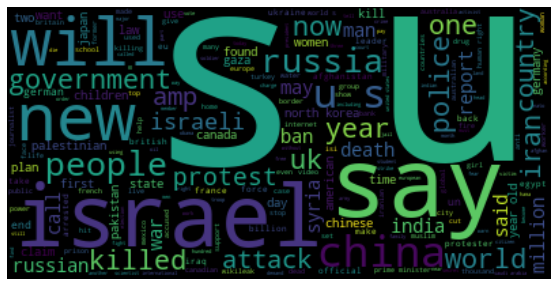

In [521]:
from keras.preprocessing.text import Tokenizer
import wordcloud
common_words=''
for i in headlines:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Model 1: Text Analysis - RandomForestClassifier

 - NLP is useful for both Machine Learning and Deep Learning
 
 
 - `Countvectorizer` is a method to convert text to numerical data. The text is transformed to a `sparse matrix`. 
 
 
  - Counting the number of times each word appears in a document.
  
  
  - Calculating the frequency that each word appears in a document out of all the words in the document.
  
  
 - Countvectorizer makes it easy for text data to be used directly in machine learning and deep learning models such as text classification.

In [522]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [523]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [524]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=100,criterion='gini')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier()

 - use append rows to all features
 - Use `countvectorizer` `Bag of words`
 - predict the test data

In [525]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [526]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [527]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[131  55]
 [  4 188]]
0.843915343915344
              precision    recall  f1-score   support

           0       0.97      0.70      0.82       186
           1       0.77      0.98      0.86       192

    accuracy                           0.84       378
   macro avg       0.87      0.84      0.84       378
weighted avg       0.87      0.84      0.84       378



#### Metrics Calculation

In [528]:
precision = precision_score(test['Label'],predictions)
recall = recall_score(test['Label'],predictions)
Accuracy = accuracy_score(test['Label'],predictions)
auc_score = roc_auc_score(test['Label'],predictions)
print("ROC-AUC Score is : ", auc_score)
print("Accuracy Score is : ", Accuracy)
print("Precision Score is : ", precision)
print("Recall Score is : ", recall)

ROC-AUC Score is :  0.841733870967742
Accuracy Score is :  0.843915343915344
Precision Score is :  0.7736625514403292
Recall Score is :  0.9791666666666666


#### Observation:
    
    In Randon Forest Classifier model, all the scores are looking good. This is a balance data set. So the accuracy score will be a good measurement.

#### Plot the precision / Recall curve

Text(0.5, 1.0, 'Randomclassifier Precision / Recall plot - model 1')

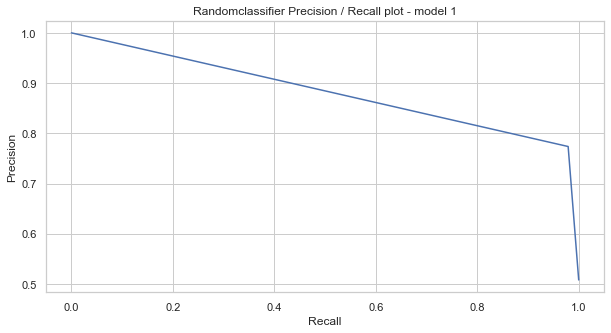

In [530]:
precision, recall, thresholds = precision_recall_curve(test['Label'],predictions)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Randomclassifier Precision / Recall plot - model 1')

In [531]:
fpr_RF1, tpr_RF1, RF1_thresh2 = roc_curve(test['Label'], predictions, pos_label=1)
# roc curve for tpr = fpr 
RF1_probs = [0 for i in range(len(test['Label']))]
p_fpr_RF1, p_tpr_RF1, _ = roc_curve(test['Label'], predictions, pos_label=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


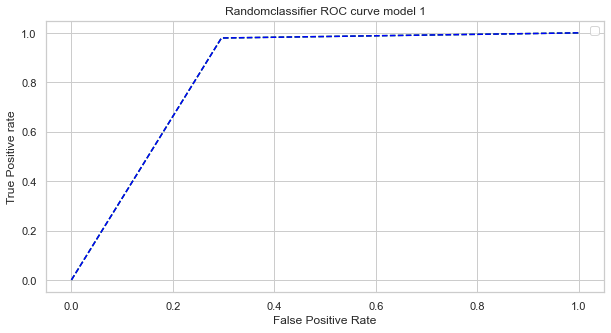

In [532]:
plt.plot(fpr_RF1, tpr_RF1, linestyle='--',color='green')
plt.plot(p_fpr_RF1, p_tpr_RF1, linestyle='--', color='blue')
# title
plt.title('Randomclassifier ROC curve model 1')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('Randomclassifier ROC Model 1',dpi=300)
plt.show();

### Sentiment Analysis using Recurrent Neural Networks(RNN)-LSTM with Python and Keras

### Model 2: LSTM For Text Classification Without Dropout

            Recurrent Neural networks like LSTM generally have the problem of overfitting.

      Dropout can be applied between layers using the Dropout Keras layer. We can do this easily by adding new Dropout 
      layers between the Embedding and LSTM layers and the LSTM and Dense output layers. 

In [533]:
data["headlines"] = headlines
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,headlines
0,georgia downs two russian warplanes as count...,breaking musharraf to be impeached,russia today columns of troops roll into sout...,russian tanks are moving towards the capital o...,afghan children raped with impunity u n of...,russian tanks have entered south ossetia w...,breaking georgia invades south ossetia russi...,the enemy combatent trials are nothing but a...,georgian troops retreat from s osettain capit...,did the u s prep georgia for war with russia,...,al qaeda faces islamist backlash,condoleezza rice the us would not act to prev...,this is a busy day the european union has ap...,georgia will withdraw soldiers from iraq...,why the pentagon thinks attacking iran is a ba...,caucasus in crisis georgia invades south osse...,indian shoe manufactory and again in a seri...,visitors suffering from mental illnesses banne...,no help for mexico s kidnapping surge,georgia downs two russian warplanes as count...


 -  Here I have added my list `headings` and `label` as new column to the dataframe. 

  #### Split the data for testing and training

In [534]:
train.shape

(1860, 27)

In [535]:
data['Label']=train['Label']
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,headlines,Label
0,georgia downs two russian warplanes as count...,breaking musharraf to be impeached,russia today columns of troops roll into sout...,russian tanks are moving towards the capital o...,afghan children raped with impunity u n of...,russian tanks have entered south ossetia w...,breaking georgia invades south ossetia russi...,the enemy combatent trials are nothing but a...,georgian troops retreat from s osettain capit...,did the u s prep georgia for war with russia,...,condoleezza rice the us would not act to prev...,this is a busy day the european union has ap...,georgia will withdraw soldiers from iraq...,why the pentagon thinks attacking iran is a ba...,caucasus in crisis georgia invades south osse...,indian shoe manufactory and again in a seri...,visitors suffering from mental illnesses banne...,no help for mexico s kidnapping surge,georgia downs two russian warplanes as count...,0


In [536]:
voc_size = 5000

In [537]:
X = data['headlines']
y = data["Label"]

In [538]:
X.shape, y.shape

((1860,), (1860,))

#### One Hot Encode Sequence Data in Python

A one hot encoding is a representation of categorical variables as binary vectors.

Categorical data must be converted to numbers. 

This applies when we are working with a sequence classification type problem and plan on using deep learning methods such as Long Short-Term Memory recurrent neural networks

In [539]:
from tensorflow.keras.preprocessing.text import one_hot

In [540]:
onehot_repr=[one_hot(words,voc_size)for words in headlines] 

 #### Embedding Representation
 We need to truncate and pad the input sequences so that they are all the same length for modeling. 
 
 The model will learn the zero values carry no information so indeed the sequences are not the same length in terms of content, but same length vectors is required to perform the computation in Keras.

In [541]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[4486 2468 2633 ... 2319 3318 4608]
 [3937 2938 2950 ...  108 1482 1095]
 [3872 4683 3622 ... 1915 2468 4099]
 ...
 [4571  491 4963 ... 2182  855 1934]
 [1476 1505 1983 ... 3974 3780 2319]
 [3502 4179 4551 ... 2391 2191 2865]]


In [542]:
embedded_docs[0]

array([4486, 2468, 2633, 3489, 2530, 1993, 1981, 4179, 1515, 1381, 3817,
       4179, 2623, 1469, 1867, 1482, 4701, 2319, 3318, 4608])

 - Compile and fit our LSTM model.

The first layer is the Embedded layer that uses 32 length vectors to represent each word. The next layer is the LSTM layer with 100 memory units (smart neurons). Finally, because this is a classification problem we use a Dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 predictions for the two classes (good and bad) in the problem.

The model is fit for only 5 epochs because it quickly overfits the problem. A large batch size of 64 reviews is used to space out weight updates.

An embedding is a mapping of a discrete — categorical — variable to a vector of continuous numbers.

Neural network embeddings are useful because they can reduce the dimensionality of categorical variables and meaningfully represent categories in the transformed space.

In [543]:
## Creating model
embedding_vector_features=32
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(LSTM(100))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 20, 32)            160000    
                                                                 
 lstm_11 (LSTM)              (None, 100)               53200     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [544]:
len(embedded_docs),y.shape

(1860, (1860,))

In [545]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [546]:
X_final.shape,y_final.shape

((1860, 20), (1860,))

#### Train and fit the data

In [547]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [548]:
### Finally Training
history = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
24/24 [==============================] - 3s 70ms/step - loss: 0.6930 - accuracy: 0.4839 - val_loss: 0.6897 - val_accuracy: 0.5672
Epoch 2/5
24/24 [==============================] - 1s 25ms/step - loss: 0.6827 - accuracy: 0.5302 - val_loss: 0.6853 - val_accuracy: 0.5699
Epoch 3/5
24/24 [==============================] - 1s 29ms/step - loss: 0.5635 - accuracy: 0.7191 - val_loss: 0.8724 - val_accuracy: 0.4946
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.3041 - accuracy: 0.8864 - val_loss: 1.1528 - val_accuracy: 0.4785
Epoch 5/5
24/24 [==============================] - 1s 25ms/step - loss: 0.1316 - accuracy: 0.9516 - val_loss: 1.3211 - val_accuracy: 0.4866


In [549]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


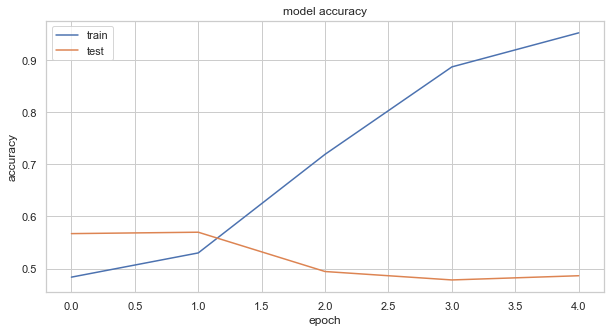

In [550]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

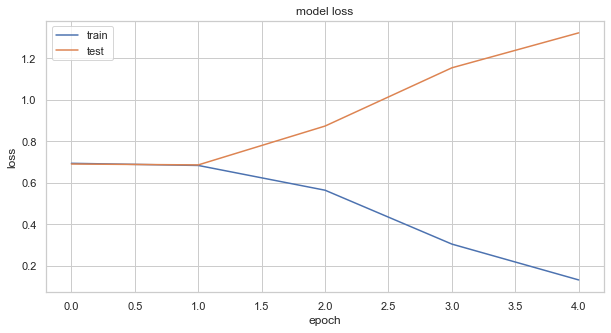

In [551]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [552]:
model1.evaluate(X_final, y_final)

59/59 [==============================] - 0s 7ms/step - loss: 0.3128 - accuracy: 0.8887


[0.3128008544445038, 0.8887096643447876]

In [553]:
# Final evaluation of the model
LSTM1 = model1.evaluate(X_final, y_final, verbose=0)
print("Accuracy: %.2f%%" %(LSTM1[1]*100))

Accuracy: 88.87%


In [554]:
(LSTM1[1]*100)

88.87096643447876

In [555]:
y_pred_LSTM1 = model1.predict(X_test)
classes_x=np.argmax(y_pred_LSTM1,axis=1)

In [556]:
confusion_matrix(y_test, y_pred_LSTM1.round())

array([[ 69,  92],
       [ 99, 112]], dtype=int64)

In [557]:
precision = precision_score(y_test, y_pred_LSTM1.round())
recall = recall_score(y_test, y_pred_LSTM1.round())
auc_score = roc_auc_score(y_test,y_pred_LSTM1)

print("ROC-AUC Score is : ", auc_score)
print("Precision Score is : ", precision)
print("Recall Score is : ", recall)

ROC-AUC Score is :  0.4828824585676017
Precision Score is :  0.5490196078431373
Recall Score is :  0.5308056872037915


#### Observation: 
    
     Here we get a very good accuracy value with LSTM without Dropout model which is 87.20%. The precision, auc_score 
     are not a good result. But recall score is good.

#### Plot the LSTM Precision /recall curve

Text(0.5, 1.0, 'LSTM without DropOut Precision / Recall plot')

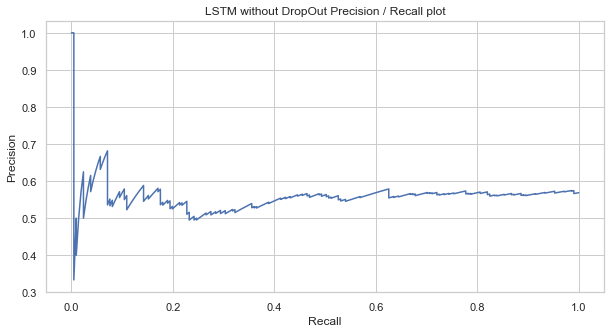

In [558]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_LSTM1)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LSTM without DropOut Precision / Recall plot')

#### Plot LSTM ROC-AUC  Curve

In [559]:
fpr_LSTM1, tpr_LSTM1, LSTM1_thresh1 = roc_curve(y_test, y_pred_LSTM1, pos_label=1)
# roc curve for tpr = fpr 
LSTM1_probs = [0 for i in range(len(y_test))]
p_fpr_LSTM1, p_tpr_LSTM1, _ = roc_curve(y_test, y_pred_LSTM1, pos_label=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


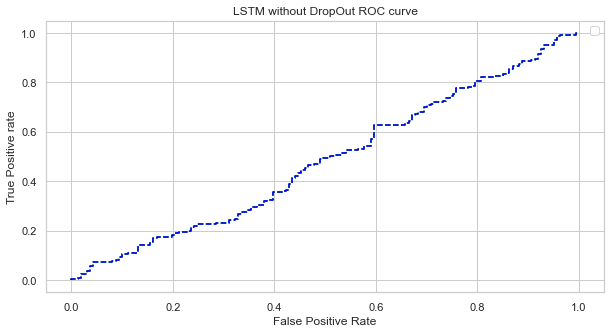

In [560]:
plt.plot(fpr_LSTM1, tpr_LSTM1, linestyle='--',color='green')
plt.plot(p_fpr_LSTM1, p_tpr_LSTM1, linestyle='--', color='blue')
# title
plt.title('LSTM without DropOut ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('LSTM ROC',dpi=300)
plt.show();

### Model 3: LSTM For text Classification With Dropout

In [561]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=32
model2 = Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(Dropout(0.3))
model2.add(LSTM(100))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [562]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [563]:
### Finally Training
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
24/24 [==============================] - 3s 43ms/step - loss: 0.6927 - accuracy: 0.5094 - val_loss: 0.6891 - val_accuracy: 0.5672
Epoch 2/5
24/24 [==============================] - 1s 25ms/step - loss: 0.6892 - accuracy: 0.5282 - val_loss: 0.6887 - val_accuracy: 0.5699
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.6459 - accuracy: 0.6048 - val_loss: 0.7072 - val_accuracy: 0.4946
Epoch 4/5
24/24 [==============================] - 1s 28ms/step - loss: 0.4494 - accuracy: 0.8118 - val_loss: 0.9580 - val_accuracy: 0.5027
Epoch 5/5
24/24 [==============================] - 1s 26ms/step - loss: 0.2585 - accuracy: 0.9052 - val_loss: 0.9708 - val_accuracy: 0.4731


In [564]:
y_pred_LSTM2 = model2.predict(X_test)
classes_x=np.argmax(y_pred_LSTM2,axis=1)

In [565]:
model2.evaluate(X_final,y_final)

59/59 [==============================] - 0s 7ms/step - loss: 0.3282 - accuracy: 0.8742


[0.32816797494888306, 0.874193549156189]

In [567]:
# Final evaluation of the model
LSTM2 = model2.evaluate(X_final, y_final, verbose=0)
print("Accuracy: %.2f%%" % (LSTM2[1]*100))

Accuracy: 87.42%


#### Observation:
     
     Here we get a very good accuracy value with LSTM with `Dropout` model which is 87.96%. The Recall score is better than Precision.


#### Metrics Calculation

In [568]:
print("Confusion matrix:")
confusion_matrix(y_test, y_pred_LSTM2.round())

Confusion matrix:


array([[ 57, 104],
       [ 92, 119]], dtype=int64)

In [569]:
auc_score = roc_auc_score(y_test, y_pred_LSTM2.round())
precision = precision_score(y_test, y_pred_LSTM2.round())
recall = recall_score(y_test, y_pred_LSTM2.round())
print("ROC-AUC Score is : ", auc_score)
print("Precision Score is : ", precision)
print("Recall Score is : ", recall)

ROC-AUC Score is :  0.4590091548673869
Precision Score is :  0.5336322869955157
Recall Score is :  0.5639810426540285


#### Plot LSTM the Precision / Recall 

Text(0.5, 1.0, 'LSTM DropOut Precision / Recall plot')

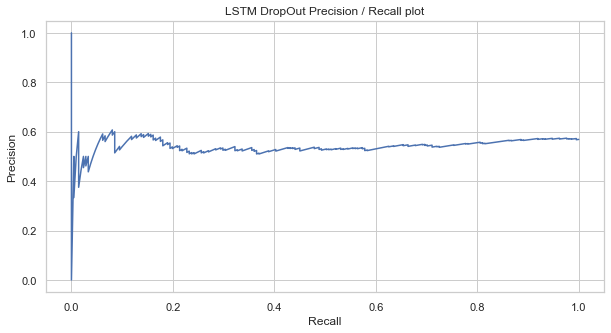

In [570]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_LSTM2)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LSTM DropOut Precision / Recall plot')

#### Plot LSTM ROC-AUC Curve with DropOut

In [571]:
fpr_LSTM2, tpr_LSTM2, LSTM2_thresh1 = roc_curve(y_test, y_pred_LSTM2, pos_label=1)
# roc curve for tpr = fpr 
LSTM1_probs = [0 for i in range(len(y_test))]
p_fpr_LSTM2, p_tpr_LSTM2, _ = roc_curve(y_test, y_pred_LSTM2, pos_label=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


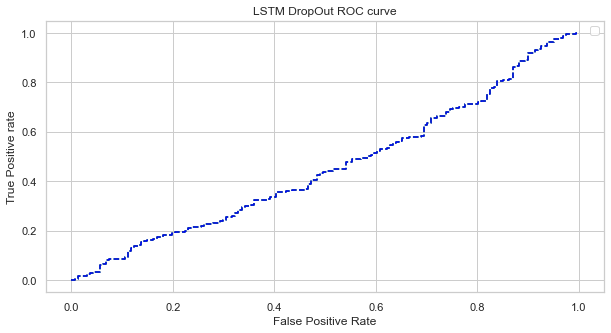

In [572]:
plt.plot(fpr_LSTM2, tpr_LSTM2, linestyle='--',color='green')
plt.plot(p_fpr_LSTM2, p_tpr_LSTM2, linestyle='--', color='blue')
# title
plt.title('LSTM DropOut ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('LSTM ROC',dpi=300)
plt.show();

## Model 4: TF-IDF

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

The term frequency is the number of occurrences of a specific term in a document. Term frequency indicates how important a specific term in a document. Term frequency represents every text from the data as a matrix whose rows are the number of documents and columns are the number of distinct terms throughout all documents.


Inverse document frequency (IDF) is the weight of a term, it aims to reduce the weight of a term if the term’s occurrences are scattered throughout all the documents.

The process of transforming text into a numerical feature is called text vectorization.

In [573]:
X = data['headlines']
y = data["Label"]

In [574]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [575]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [576]:
#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train)
#applying tf idf to training data
X_train_tf = tf_idf.transform(X_train)

In [577]:
#transforming test data into tf-idf matrix
X_test_tf = tf_idf.transform(X_test)

### Model 4.A - TF-IDF Prediction with Random Forest Classifier 

In [578]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=100,criterion='gini')
randomclassifier = randomclassifier.fit(X_train_tf, y_train.values.ravel())

In [579]:
y_pred_RF = randomclassifier.predict(X_test_tf)

#### Metrics Calculation

In [580]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_RF))

auc_score = roc_auc_score(y_test, y_pred_RF)
precision = precision_score(y_test, y_pred_RF)
recall = recall_score(y_test, y_pred_RF)
Accuracy = accuracy_score(y_test, y_pred_RF)

print("ROC-AUC Score is : ", auc_score)
print("Accuracy Score is : ", Accuracy)
print("Precision Score is : ", precision)
print("Recall Score is : ", recall)

Confusion matrix:
[[ 65  96]
 [ 83 128]]
ROC-AUC Score is :  0.5051808895822908
Accuracy Score is :  0.5188172043010753
Precision Score is :  0.5714285714285714
Recall Score is :  0.6066350710900474


#### Observation:

    In TF-IDF with Random Forest Classifier, The Accuracy, ROC are less and precision score is 56.34%. 

    But the recall score is 67% which is a good value.
    

#### Plot the Precision / Recall curve of TF-IDF - Random Forest Classifier

Text(0.5, 1.0, 'TF-IDF - Random Forest Classifier - Precision / Recall plot')

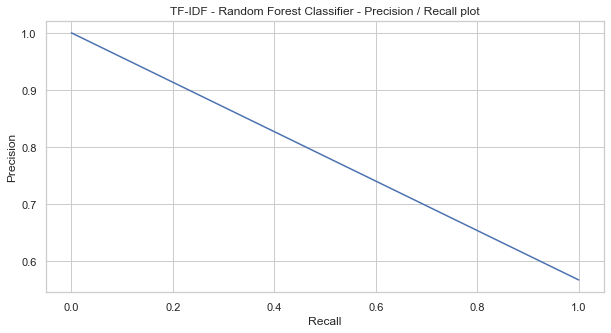

In [581]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_NB)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('TF-IDF - Random Forest Classifier - Precision / Recall plot')

#### Plot the ROC-AUC curve of TF-IDF - Random Forest Classifier

In [582]:
fpr_RF, tpr_RF, RF_thresh = roc_curve(y_test, y_pred_RF, pos_label=1)
# roc curve for tpr = fpr 
RF_probs = [0 for i in range(len(y_test))]
p_fpr_RF, p_tpr_RF, _ = roc_curve(y_test, y_pred_RF, pos_label=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


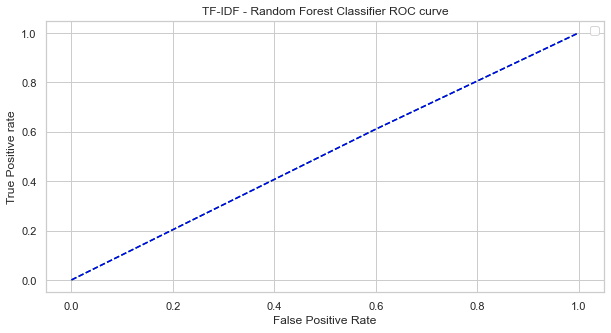

In [583]:
plt.plot(fpr_RF, tpr_RF, linestyle='--',color='green')
plt.plot(p_fpr_RF, p_tpr_RF, linestyle='--', color='blue')
# title
plt.title('TF-IDF - Random Forest Classifier ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('TF-IDF - Random Forest Classifier ROC',dpi=300)
plt.show();

### Model 4.B - TF-IDF Prediction with Naive Bayes

In [592]:

from sklearn.naive_bayes import MultinomialNB
#naive bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)

MultinomialNB()

In [593]:
#predicted y
y_pred_NB = naive_bayes_classifier.predict(X_test_tf)

####  Metrics Calculation

In [594]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_NB))

auc_score = roc_auc_score(y_test, y_pred_NB)
precision = precision_score(y_test, y_pred_NB)
recall = recall_score(y_test, y_pred_NB)
Accuracy = accuracy_score(y_test, y_pred_NB)

print("ROC-AUC Score is : ", auc_score)
print("Accuracy Score is : ", Accuracy)
print("Precision Score is : ", precision)
print("Recall Score is : ", recall)

Confusion matrix:
[[  0 161]
 [  0 211]]
ROC-AUC Score is :  0.5
Accuracy Score is :  0.5672043010752689
Precision Score is :  0.5672043010752689
Recall Score is :  1.0


#### Observation: 
    
    In TF-IDF Naive Bayes, Accuracy, AUC, and precision score are less which is 56.72% and the recall score is 100%!. This model is better than TF-IDF Random Forest model.
    
    

#### Plot the Precision / Recall curve of TF-IDF Naive Bayes

Text(0.5, 1.0, 'TF-IDF Naive Bayes Precision / Recall plot')

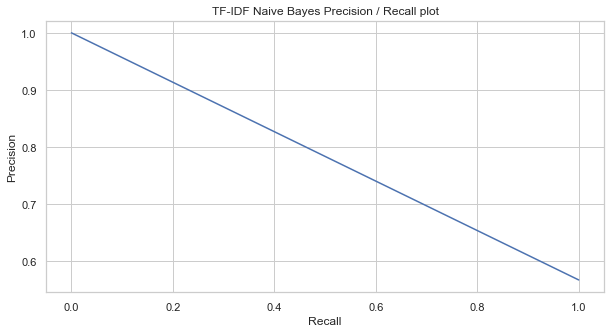

In [595]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_NB)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('TF-IDF Naive Bayes Precision / Recall plot')

#### Plot the ROC-AUC curve of TF-IDF Naive Bayes

In [596]:
fpr_NB, tpr_NB, NB_thresh = roc_curve(y_test, y_pred_NB, pos_label=1)
# roc curve for tpr = fpr 
NB_probs = [0 for i in range(len(y_test))]
p_fpr_NB, p_tpr_NB, _ = roc_curve(y_test, y_pred_NB, pos_label=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


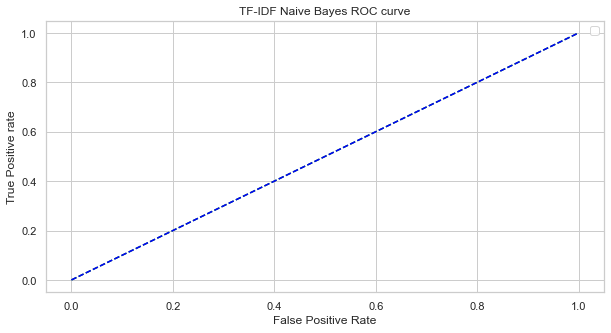

In [597]:
plt.plot(fpr_NB, tpr_NB, linestyle='--',color='green')
plt.plot(p_fpr_NB, p_tpr_NB, linestyle='--', color='blue')
# title
plt.title('TF-IDF Naive Bayes ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('TF-IDF Naive Bayes ROC',dpi=300)
plt.show();

## Model 5: word2vec Vectors

In [598]:
from gensim.models import Word2Vec

In [599]:
X = data['headlines']
y = data["Label"]

In [600]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [601]:
# train word2vec model
Word2Vec_model = Word2Vec(headlines, size=100, window=5, workers=3, min_count=5)
# summarize vocabulary size in model
words = list(Word2Vec_model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 27


In [602]:
import gensim
Word2Vec_model = gensim.models.Word2Vec(X_train, size=100, window=5, workers=3, min_count=5)                           

In [603]:
# Replace the words in each combined headline with the learned word vector (turns each headline to a numeric vector)
# index2word attribute is the list of words the model has learned word vectors for and we are storing that in a set called words (all words that word2vec knows)
# Finally, we are cycling thru each word in each headline and return the word vector for that word and then we are converting the list to an array for elementwise averaging in the next step
words = set(Word2Vec_model.wv.index2word)
X_train_vect = np.array([np.array([Word2Vec_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([Word2Vec_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

Average the word vectors for each sentence (and assign a vector of zeros if the model did not learn any of the words in the text message during training

This is necessary for the ML model to work: Each headline should be represented the same way (vector size: 100)

 Any unlearned word will be represented by a vector of zeros

In [604]:
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

#### Fit and Predict

In [605]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=100, criterion='gini')
randomclassifier = randomclassifier.fit(X_train_vect_avg, y_train.values.ravel())

In [606]:
y_pred_W2V = randomclassifier.predict(X_test_vect_avg)

#### Metrics Calculation

In [607]:

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_W2V))
precision = precision_score(y_test, y_pred_W2V)
recall = recall_score(y_test, y_pred_W2V)
Accuracy = accuracy_score(y_test, y_pred_W2V)
auc_score = roc_auc_score(y_test, y_pred_W2V)
print("ROC-AUC Score is : ", auc_score)
print("Accuracy Score is : ", Accuracy)
print("Precision Score is : ", precision)
print("Recall Score is : ", recall)


Confusion matrix:
[[ 72  89]
 [ 82 129]]
ROC-AUC Score is :  0.5292896882635189
Accuracy Score is :  0.5403225806451613
Precision Score is :  0.591743119266055
Recall Score is :  0.6113744075829384


#### Observation: 
 This model is not better than FT-IDF.
    
    In TF-IDF, Accuracy and ROC score are less which is 51% and 50% and the recall score is 53%
    
    

#### Plot the Precision / Recall score for Word2Vec

Text(0.5, 1.0, 'Word2Vec Precision / Recall plot')

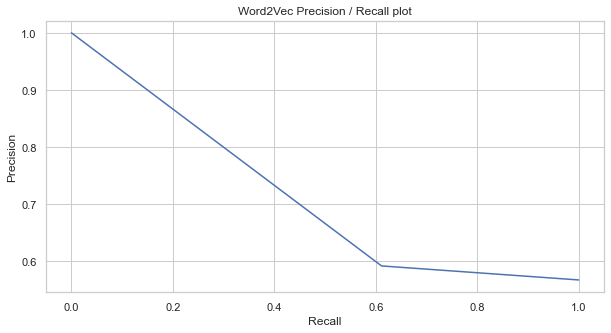

In [608]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_W2V)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Word2Vec Precision / Recall plot')

#### Plot the ROC-AUC for Word2Vec

In [609]:
fpr_W2V2, tpr_W2V2, W2V_thresh2 = roc_curve(y_test, y_pred_W2V, pos_label=1)
# roc curve for tpr = fpr 
W2V_probs = [0 for i in range(len(y_test))]
p_fpr_W2V, p_tpr_W2V, _ = roc_curve(y_test, W2V_probs, pos_label=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


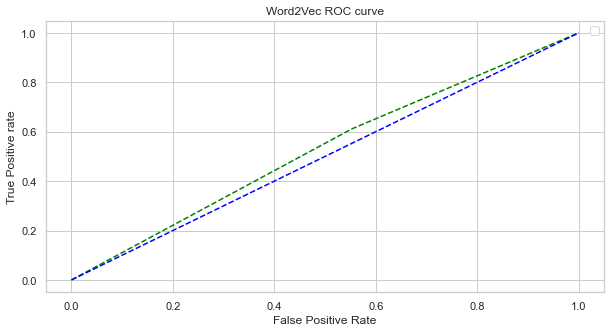

In [610]:
plt.plot(fpr_W2V2, tpr_W2V2, linestyle='--',color='green')
plt.plot(p_fpr_W2V, p_tpr_W2V, linestyle='--', color='blue')
# title
plt.title('Word2Vec ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Visualization of Word2Vec model

In [619]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['headlines']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        


In [620]:
from gensim.models import word2vec
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model.wv['america']

array([ 0.01964012,  0.7184547 ,  0.04249284, -0.48282146,  0.4632607 ,
        0.33438927, -0.30162215, -0.54980093, -0.03969187, -0.41226098,
        0.49336278,  0.3722525 ,  0.10802938,  0.10464323,  0.28900656,
       -0.51637036, -0.08025216,  0.01341271,  0.29301944, -0.6269557 ,
       -0.36229634, -0.03170628,  0.27169183, -0.42662853, -0.22383034,
        0.31674233, -0.12431002,  0.22296777,  0.20882729,  0.03593247,
       -0.4316315 , -0.15380505,  0.02290256,  0.13588561,  0.32547796,
       -0.32677832,  0.09227542, -0.36821234, -0.27898026,  0.2765906 ,
        0.49170443,  0.09604899,  0.7140338 ,  0.20757017,  0.18787593,
       -0.31526673, -0.68046796, -0.08933385,  0.4452171 , -0.35821947,
       -0.31334442, -0.02443874, -0.64256585,  0.99231434, -0.13295087,
       -0.00413893, -0.2691353 ,  0.0433092 ,  0.04833972, -0.689776  ,
       -0.20362039,  0.01409057, -0.00274233, -0.03152931,  0.04530161,
       -0.50820035, -0.32040992, -0.24712157,  0.2780892 , -0.04

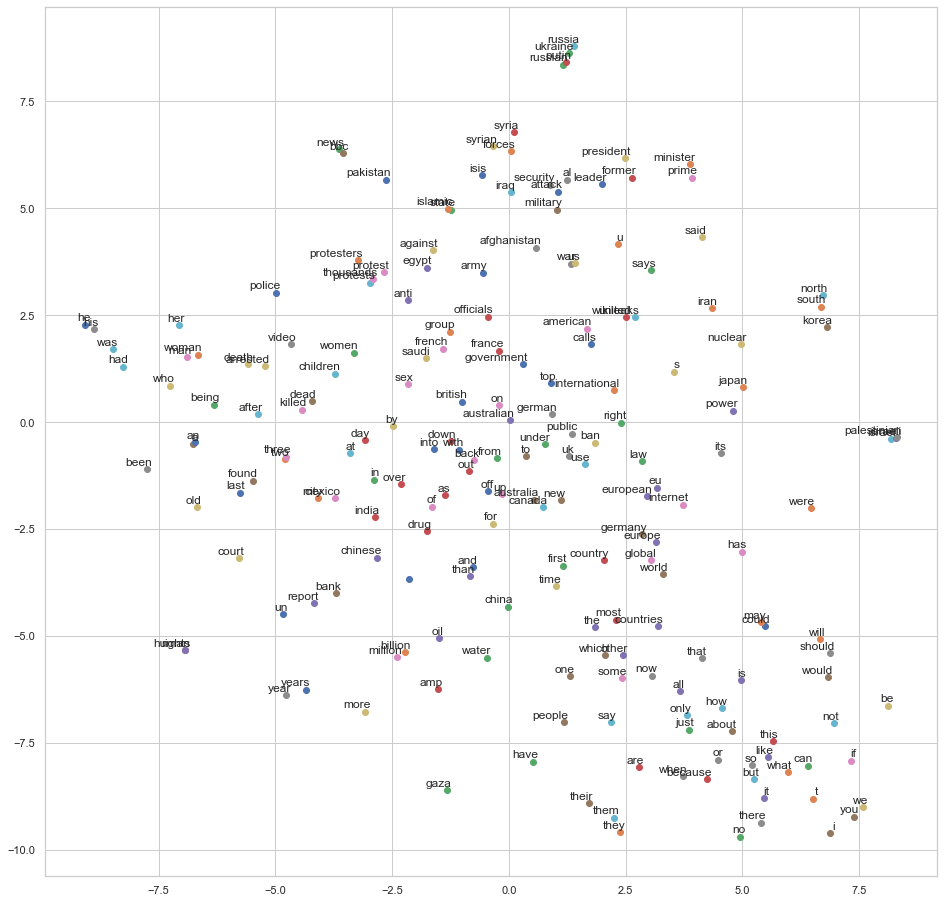

In [622]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

### Accuracy score model comparison

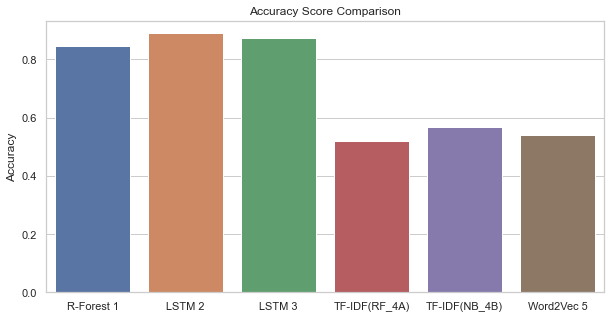

In [617]:
sns.set_theme(style="whitegrid")
sns.barplot(x=["R-Forest 1", "LSTM 2", "LSTM 3", "TF-IDF(RF_4A)", "TF-IDF(NB_4B)", "Word2Vec 5"],
            y=[accuracy_score(test['Label'],predictions), (LSTM1[1]), (LSTM2[1]), accuracy_score(y_test, y_pred_RF),
               accuracy_score(y_test, y_pred_NB), accuracy_score(y_test, y_pred_W2V)])

plt.title('Accuracy Score Comparison')                 
plt.ylabel("Accuracy") 
plt.show()

### Recall_score model comparison

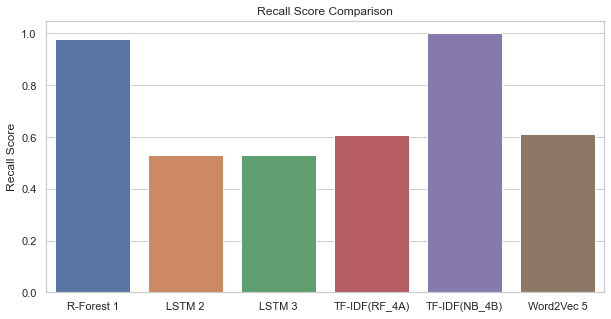

In [618]:
sns.set_theme(style="whitegrid")
sns.barplot(x=["R-Forest 1", "LSTM 2", "LSTM 3", "TF-IDF(RF_4A)", "TF-IDF(NB_4B)", "Word2Vec 5"],
            y=[recall_score(test['Label'],predictions), recall_score(y_test, y_pred_LSTM1.round()),
               recall_score(y_test, y_pred_LSTM1.round()), recall_score(y_test, y_pred_RF), recall_score(y_test, y_pred_NB), recall_score(y_test, y_pred_W2V)])
               

plt.title('Recall Score Comparison')    
plt.ylabel("Recall Score") 
plt.show()

## Summary:
        
 - The model 2 and Model 3 LSTM with  DropOut and with DropOut is also a good model.
 
   
  - Model 1 : Accuracy value with LSTM without Dropout model which is 84.39%.  Also a good Recall score 
      
   
  - Model 2 : Accuracy value with LSTM without Dropout model which is 87.2%.
       
       
  - Model 3 : Accuracy value with LSTM  `Dropout` model which is 87.96%.
       
       
  - Model 4A : TF-IDF Prediction with Random Forest Classifier Accuracy Score is 51.88%
       
       
  - Model 4B : TF-IDF  Prediction with Naive Bayes Accuracy Score is 56.72%.  Also higher Recall score 
       
       
  - Model 5 : Word2Vec Accuracy Score is 51.07%
       